In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:2].values #also[:,1:-1]
y = dataset.iloc[:,2].values #[:,:-1]

In [3]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
#covert 1d array to 2d array
y =y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [ ]:
#normalize
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X) #normalized
y = sc_y.fit_transform(y)

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

c:\Users\daood\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
regressor.predict([[6.5]])

array([0.01158103])

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)) #convert to original array

array([[170370.0204065]])

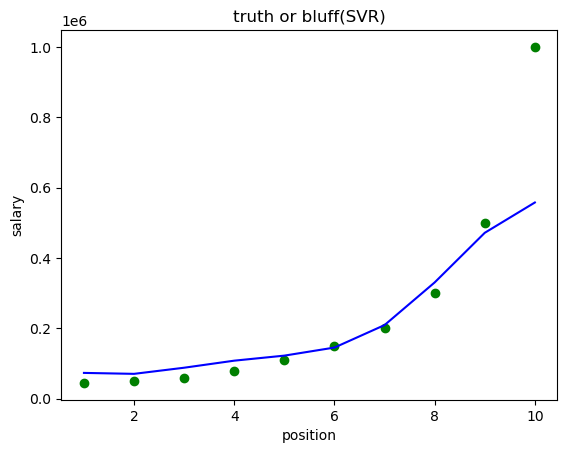

In [17]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color ='green')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color = 'blue')
plt.title('truth or bluff(SVR)')
plt.xlabel("position")
plt.ylabel("salary")
plt.show()